## ANN Using PCA


### Using ReLU

Components: 10, Test Accuracy: 0.5408
Components: 20, Test Accuracy: 0.5885
Components: 30, Test Accuracy: 0.5885
Components: 40, Test Accuracy: 0.5089
Components: 50, Test Accuracy: 0.6183
Components: 60, Test Accuracy: 0.6282
Components: 70, Test Accuracy: 0.5169
Components: 80, Test Accuracy: 0.5626
Components: 90, Test Accuracy: 0.5885
Components: 100, Test Accuracy: 0.5845
Components: 110, Test Accuracy: 0.5765
Components: 120, Test Accuracy: 0.5567
Components: 130, Test Accuracy: 0.5805
Components: 140, Test Accuracy: 0.5189
Components: 150, Test Accuracy: 0.5368
Components: 160, Test Accuracy: 0.6163
Components: 170, Test Accuracy: 0.6004
Components: 180, Test Accuracy: 0.5785
Components: 190, Test Accuracy: 0.5527
Components: 200, Test Accuracy: 0.5249
Components: 210, Test Accuracy: 0.6064
Components: 220, Test Accuracy: 0.6083
Components: 230, Test Accuracy: 0.5467
Components: 240, Test Accuracy: 0.5129
Components: 250, Test Accuracy: 0.5547
Components: 260, Test Accuracy: 0.

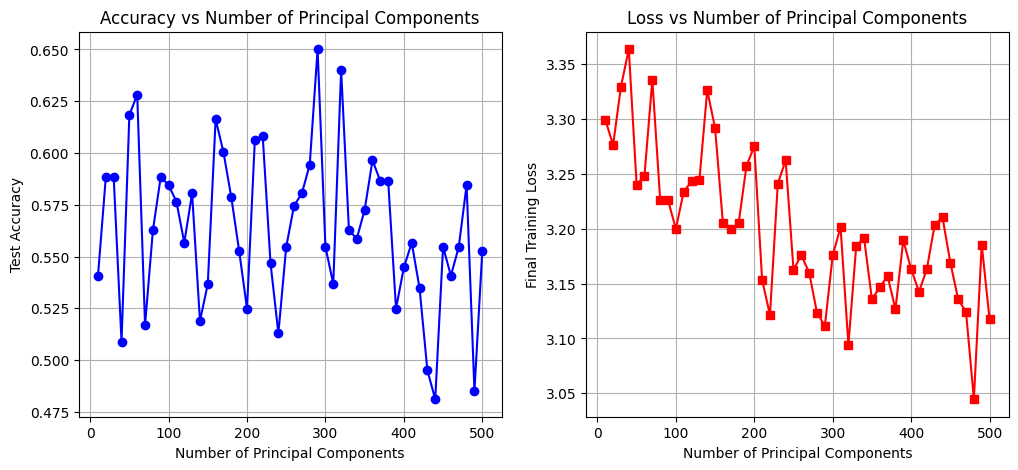

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# PCA Implementation
def standardise_data(dataset, mean=None, std_dev=None):
    if mean is None or std_dev is None:
        mean = np.mean(dataset, axis=0)
        std_dev = np.std(dataset, axis=0)
    std_data = (dataset - mean) / std_dev
    return std_data, mean, std_dev

def covariance_matrix(dataset):
    m = dataset.shape[0]
    return np.dot(dataset.T, dataset) / (m - 1)

def eigenvalues_eigenvectors(cov_matrix):
    return np.linalg.eig(cov_matrix)

def sort_eigenpairs(eigenvalues, eigenvectors):
    sorted_indices = np.argsort(eigenvalues)[::-1]
    return eigenvalues[sorted_indices], eigenvectors[:, sorted_indices]

def project_dataset_to_new_plane(X, eigenvectors, top_n=1):
    return np.dot(X, eigenvectors[:, :top_n])

# Load data
X = np.load("X_features.npy")
y = np.load("y_labels.npy")

# Standardize the data
X_scaled, mean, std_dev = standardise_data(X)

# Compute covariance matrix and eigenvalues/eigenvectors
cov_matrix = covariance_matrix(X_scaled)
eigenvalues, eigenvectors = eigenvalues_eigenvectors(cov_matrix)
eigenvalues, eigenvectors = sort_eigenpairs(eigenvalues, eigenvectors)

# Experiment with different numbers of components
components_range = list(range(10, 501, 10))
accuracies = []
losses_per_component = []

for num_components in components_range:
    X_pca = project_dataset_to_new_plane(X_scaled, eigenvectors, top_n=num_components)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long)
    y_test_tensor = torch.tensor(y_test, dtype=torch.long)

    # Define ANN model
    class ANN(nn.Module):
        def __init__(self, input_dim):
            super(ANN, self).__init__()
            self.fc1 = nn.Linear(input_dim, 64)
            self.fc2 = nn.Linear(64, 32)
            self.fc3 = nn.Linear(32, len(np.unique(y)))  # Output layer
            self.relu = nn.ReLU()
            self.softmax = nn.Softmax(dim=1)

        def forward(self, x):
            x = self.relu(self.fc1(x))
            x = self.relu(self.fc2(x))
            x = self.fc3(x)
            return self.softmax(x)

    # Initialize model
    model = ANN(num_components)

    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    # Training loop
    epochs = 50 # tried 20, 70, 100 but best set came for 50
    losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    losses_per_component.append(losses[-1])

    # Evaluate model
    with torch.no_grad():
        y_pred = model(X_test_tensor).argmax(dim=1).numpy()
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    print(f"Components: {num_components}, Test Accuracy: {accuracy:.4f}")

# Plot accuracy vs number of components
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(components_range, accuracies, marker='o', color='b')
plt.xlabel("Number of Principal Components")
plt.ylabel("Test Accuracy")
plt.title("Accuracy vs Number of Principal Components")
plt.grid()

# Plot loss vs number of components
plt.subplot(1, 2, 2)
plt.plot(components_range, losses_per_component, marker='s', color='r')
plt.xlabel("Number of Principal Components")
plt.ylabel("Final Training Loss")
plt.title("Loss vs Number of Principal Components")
plt.grid()

plt.show()



Experimented with different numbers of components

Components: 100, Test Accuracy: 0.6183
Components: 101, Test Accuracy: 0.6024
Components: 102, Test Accuracy: 0.5845
Components: 103, Test Accuracy: 0.5348
Components: 104, Test Accuracy: 0.6163
Components: 105, Test Accuracy: 0.5726
Components: 106, Test Accuracy: 0.5109
Components: 107, Test Accuracy: 0.6262
Components: 108, Test Accuracy: 0.6024
Components: 109, Test Accuracy: 0.5845
Components: 110, Test Accuracy: 0.5089
Components: 111, Test Accuracy: 0.5706
Components: 112, Test Accuracy: 0.6044
Components: 113, Test Accuracy: 0.6183
Components: 114, Test Accuracy: 0.6044
Components: 115, Test Accuracy: 0.6700
Components: 116, Test Accuracy: 0.5805
Components: 117, Test Accuracy: 0.5328
Components: 118, Test Accuracy: 0.6282
Components: 119, Test Accuracy: 0.5785
Components: 120, Test Accuracy: 0.6302
Components: 121, Test Accuracy: 0.6083
Components: 122, Test Accuracy: 0.5865
Components: 123, Test Accuracy: 0.5527
Components: 124, Test Accuracy: 0.4831
Components: 125, Test Acc

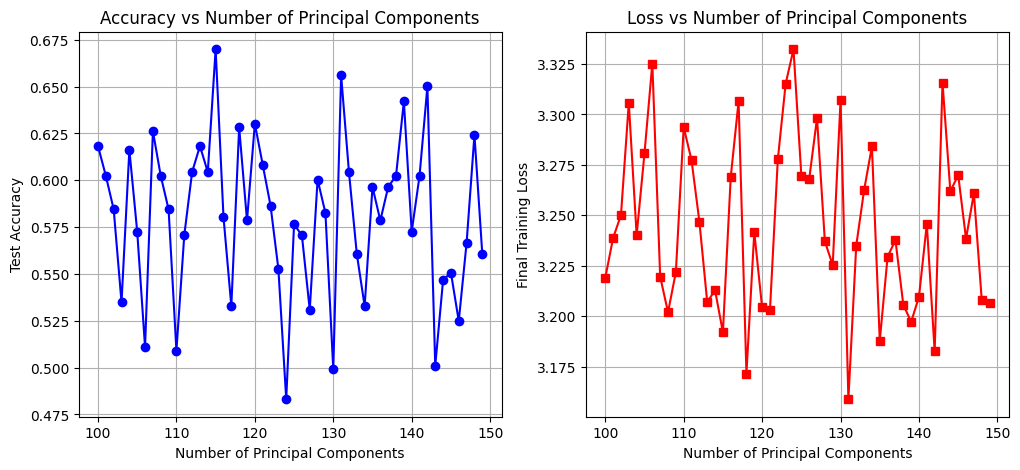

In [ ]:
 # Experimented with different numbers of components

components_range = list(range(100, 150, 1))
accuracies = []
losses_per_component = []

for num_components in components_range:
    X_pca = project_dataset_to_new_plane(X_scaled, eigenvectors, top_n=num_components)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long)
    y_test_tensor = torch.tensor(y_test, dtype=torch.long)

    # Define ANN model
    class ANN(nn.Module):
        def __init__(self, input_dim):
            super(ANN, self).__init__()
            self.fc1 = nn.Linear(input_dim, 64)
            self.fc2 = nn.Linear(64, 32)
            self.fc3 = nn.Linear(32, len(np.unique(y)))  # Output layer
            self.relu = nn.ReLU()
            self.softmax = nn.Softmax(dim=1)

        def forward(self, x):
            x = self.relu(self.fc1(x))
            x = self.relu(self.fc2(x))
            x = self.fc3(x)
            return self.softmax(x)

    # Initialize model
    model = ANN(num_components)

    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    # Training loop
    epochs = 50
    losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    losses_per_component.append(losses[-1])

    # Evaluate model
    with torch.no_grad():
        y_pred = model(X_test_tensor).argmax(dim=1).numpy()
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    print(f"Components: {num_components}, Test Accuracy: {accuracy:.4f}")

# Plot accuracy vs number of components
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(components_range, accuracies, marker='o', color='b')
plt.xlabel("Number of Principal Components")
plt.ylabel("Test Accuracy")
plt.title("Accuracy vs Number of Principal Components")
plt.grid()

# Plot loss vs number of components
plt.subplot(1, 2, 2)
plt.plot(components_range, losses_per_component, marker='s', color='r')
plt.xlabel("Number of Principal Components")
plt.ylabel("Final Training Loss")
plt.title("Loss vs Number of Principal Components")
plt.grid()

plt.show()


In [ ]:
# Selected 133 principal components as they gave the best accuracy from above data and graph:

num_components = 133
X_pca = project_dataset_to_new_plane(X_scaled, eigenvectors, top_n=num_components)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Define ANN model
class ANN(nn.Module):
    def __init__(self, input_dim):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, len(np.unique(y)))  # Output layer
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return self.softmax(x)

# Initialize model
model = ANN(num_components)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 50
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

# Evaluate model
with torch.no_grad():
    y_pred = model(X_test_tensor).argmax(dim=1).numpy()
    accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy with 133 Components: {accuracy*100:.4f}")

Test Accuracy with 133 Components: 62.4254


### Using ReLu, Sigmoid, Tanh simultaneously

Components: 10, Test Accuracy: 0.6163
Components: 20, Test Accuracy: 0.6819
Components: 30, Test Accuracy: 0.7614
Components: 40, Test Accuracy: 0.7256
Components: 50, Test Accuracy: 0.6660
Components: 60, Test Accuracy: 0.7256
Components: 70, Test Accuracy: 0.7614
Components: 80, Test Accuracy: 0.7555
Components: 90, Test Accuracy: 0.7256
Components: 100, Test Accuracy: 0.6978
Components: 110, Test Accuracy: 0.7336
Components: 120, Test Accuracy: 0.7376
Components: 130, Test Accuracy: 0.7475
Components: 140, Test Accuracy: 0.6938
Components: 150, Test Accuracy: 0.6839
Components: 160, Test Accuracy: 0.6640
Components: 170, Test Accuracy: 0.6740
Components: 180, Test Accuracy: 0.6938
Components: 190, Test Accuracy: 0.7654
Components: 200, Test Accuracy: 0.6720
Components: 210, Test Accuracy: 0.7276
Components: 220, Test Accuracy: 0.6799
Components: 230, Test Accuracy: 0.7018
Components: 240, Test Accuracy: 0.6243
Components: 250, Test Accuracy: 0.6680
Components: 260, Test Accuracy: 0.

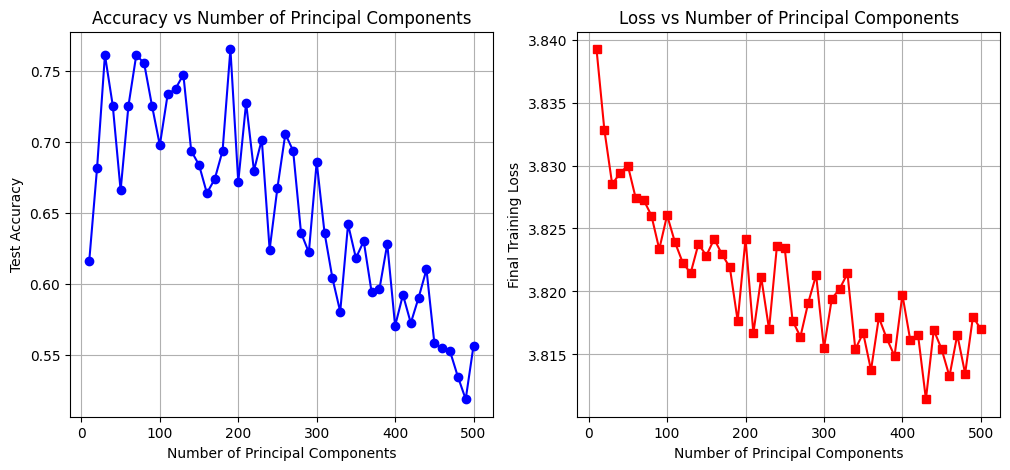

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# PCA Implementation
def standardise_data(dataset, mean=None, std_dev=None):
    if mean is None or std_dev is None:
        mean = np.mean(dataset, axis=0)
        std_dev = np.std(dataset, axis=0)
    std_data = (dataset - mean) / std_dev
    return std_data, mean, std_dev

def covariance_matrix(dataset):
    m = dataset.shape[0]
    return np.dot(dataset.T, dataset) / (m - 1)

def eigenvalues_eigenvectors(cov_matrix):
    return np.linalg.eig(cov_matrix)

def sort_eigenpairs(eigenvalues, eigenvectors):
    sorted_indices = np.argsort(eigenvalues)[::-1]
    return eigenvalues[sorted_indices], eigenvectors[:, sorted_indices]

def project_dataset_to_new_plane(X, eigenvectors, top_n):
    return np.dot(X, eigenvectors[:, :top_n])

# Load data
X = np.load("X_features.npy")
y = np.load("y_labels.npy")

# Standardize the data
X_scaled, mean, std_dev = standardise_data(X)

# Compute covariance matrix and eigenvalues/eigenvectors
cov_matrix = covariance_matrix(X_scaled)
eigenvalues, eigenvectors = eigenvalues_eigenvectors(cov_matrix)
eigenvalues, eigenvectors = sort_eigenpairs(eigenvalues, eigenvectors)

# Experiment with different numbers of components
components_range = list(range(10, 501, 10))
accuracies = []
losses_per_component = []

for num_components in components_range:
    X_pca = project_dataset_to_new_plane(X_scaled, eigenvectors, top_n=num_components)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long)
    y_test_tensor = torch.tensor(y_test, dtype=torch.long)

    # Define ANN model
    class ANN(nn.Module):
      def __init__(self, input_dim):
          super(ANN, self).__init__()
          self.fc1 = nn.Linear(input_dim, 64)
          self.fc2 = nn.Linear(64, 32)
          self.fc3 = nn.Linear(32, len(np.unique(y)))  # Output layer

          self.relu = nn.ReLU()       # First Layer Activation
          self.sigmoid = nn.Sigmoid() # Second Layer Activation
          self.tanh = nn.Tanh()       # Third Layer Activation
          self.softmax = nn.Softmax(dim=1)  # Output Activation

      def forward(self, x):
          x = self.relu(self.fc1(x))    # ReLU in first layer
          x = self.sigmoid(self.fc2(x)) # Sigmoid in second layer
          x = self.tanh(self.fc3(x))    # Tanh in third layer
          return self.softmax(x)        # Softmax for classification

    # Initialize model
    model = ANN(num_components)

    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    # Training loop
    epochs = 50
    losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    losses_per_component.append(losses[-1])

    # Evaluate model
    with torch.no_grad():
        y_pred = model(X_test_tensor).argmax(dim=1).numpy()
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    print(f"Components: {num_components}, Test Accuracy: {accuracy:.4f}")

# Plot accuracy vs number of components
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(components_range, accuracies, marker='o', color='b')
plt.xlabel("Number of Principal Components")
plt.ylabel("Test Accuracy")
plt.title("Accuracy vs Number of Principal Components")
plt.grid()

# Plot loss vs number of components
plt.subplot(1, 2, 2)
plt.plot(components_range, losses_per_component, marker='s', color='r')
plt.xlabel("Number of Principal Components")
plt.ylabel("Final Training Loss")
plt.title("Loss vs Number of Principal Components")
plt.grid()

plt.show()


In [ ]:
# Selected 190 principal components as they gave best accuracy from above data and graph:

num_components = 190
X_pca = project_dataset_to_new_plane(X_scaled, eigenvectors, top_n=num_components)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Define ANN model
class ANN(nn.Module):
  def __init__(self, input_dim):
      super(ANN, self).__init__()
      self.fc1 = nn.Linear(input_dim, 64)
      self.fc2 = nn.Linear(64, 32)
      self.fc3 = nn.Linear(32, len(np.unique(y)))  # Output layer

      self.relu = nn.ReLU()       # First Layer Activation
      self.sigmoid = nn.Sigmoid() # Second Layer Activation
      self.tanh = nn.Tanh()       # Third Layer Activation
      self.softmax = nn.Softmax(dim=1)  # Output Activation

  def forward(self, x):
      x = self.relu(self.fc1(x))    # ReLU in first layer
      x = self.sigmoid(self.fc2(x)) # Sigmoid in second layer
      x = self.tanh(self.fc3(x))    # Tanh in third layer
      return self.softmax(x)        # Softmax for classification

# Initialize model
model = ANN(num_components)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 50
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

# Evaluate model
with torch.no_grad():
    y_pred = model(X_test_tensor).argmax(dim=1).numpy()
    accuracy = accuracy_score(y_test, y_pred)

print(f"Best Test Accuracy with 190 Components: {accuracy*100:.4f}")

Best Test Accuracy with 190 Components: 72.1670
